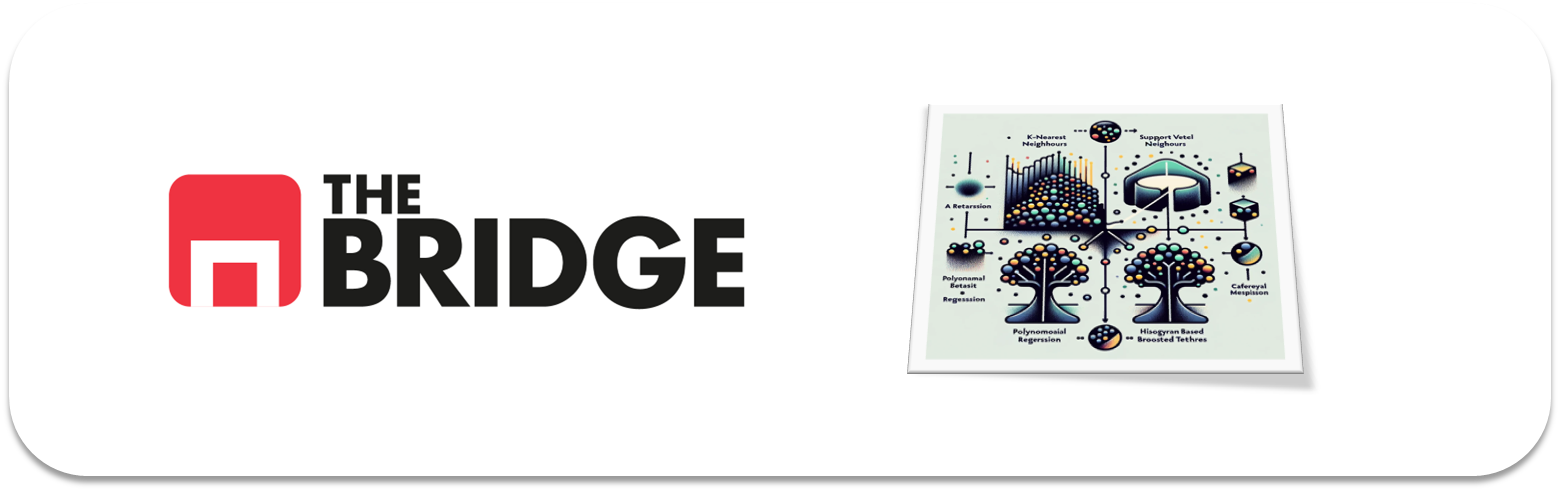

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.mode.copy_on_write = True

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df = pd.read_csv("./data/wines_dataset.csv", sep="|")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,white
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,white
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


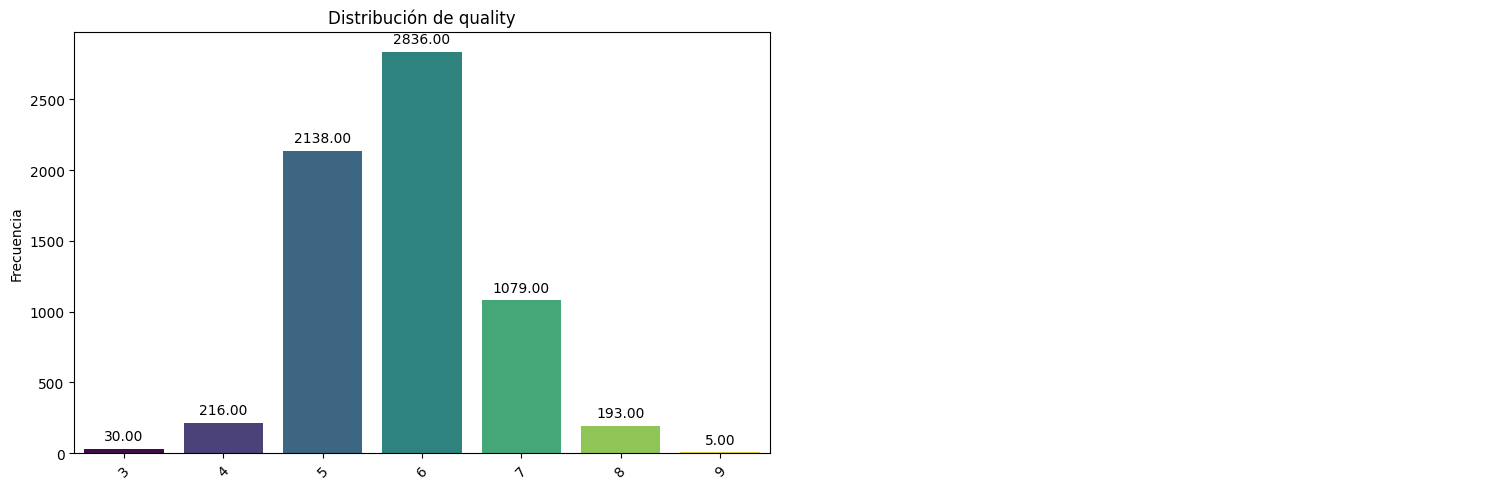

In [6]:
bt.pinta_distribucion_categoricas(df,["quality"], mostrar_valores= True, relativa=False) 

Será mejor agrupar la calidad del vino en tres niveles (baja, media y alta) y así convertir un problema de 7 clases desbalanceadas en un problema más estable, más interpretable y más útil para el modelo.

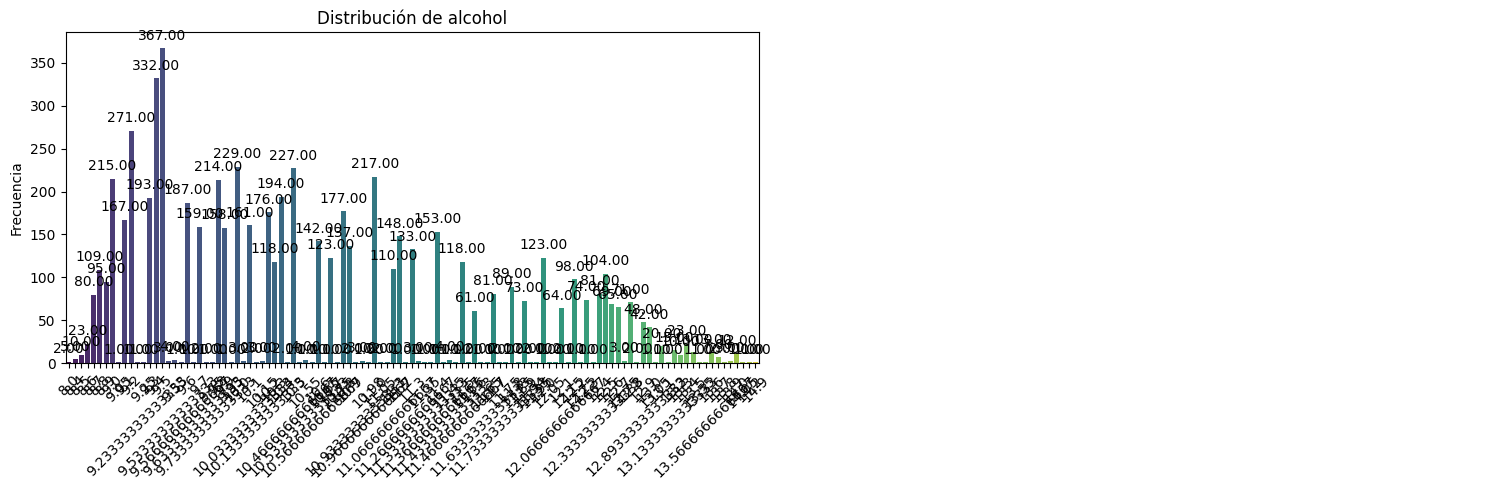

In [7]:
bt.pinta_distribucion_categoricas(df,["alcohol"], mostrar_valores= True, relativa=False) 

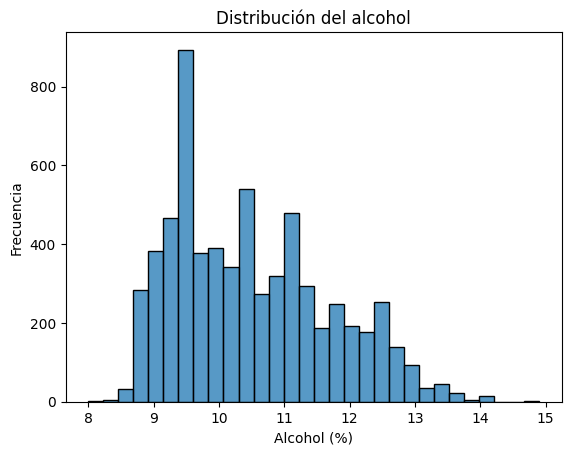

In [8]:
sns.histplot(df["alcohol"], bins=30, kde=False)
plt.title("Distribución del alcohol")
plt.xlabel("Alcohol (%)")
plt.ylabel("Frecuencia")
plt.show()

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

### Mejorar la target

In [9]:
def agrupar_calidad(q):
    if q <= 4:
        return 0      # low
    elif q <= 6:
        return 1      # medium
    else:
        return 2      # high

df["quality_grouped"] = df["quality"].apply(agrupar_calidad)

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class,quality_grouped
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white,1
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white,1
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white,2
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white,0
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,white,1
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red,1
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,white,1
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,red,1


In [11]:
df["quality_grouped"].value_counts().sort_index()

quality_grouped
0     246
1    4974
2    1277
Name: count, dtype: int64

Elimino quality para quedarme solo la nueva columna que acabo de creear

In [12]:
df = df.drop(columns=["quality"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  class                 6497 non-null   object 
 12  quality_grouped       6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Veo la nueva distribución del target

In [14]:
target_cls = "quality_grouped"

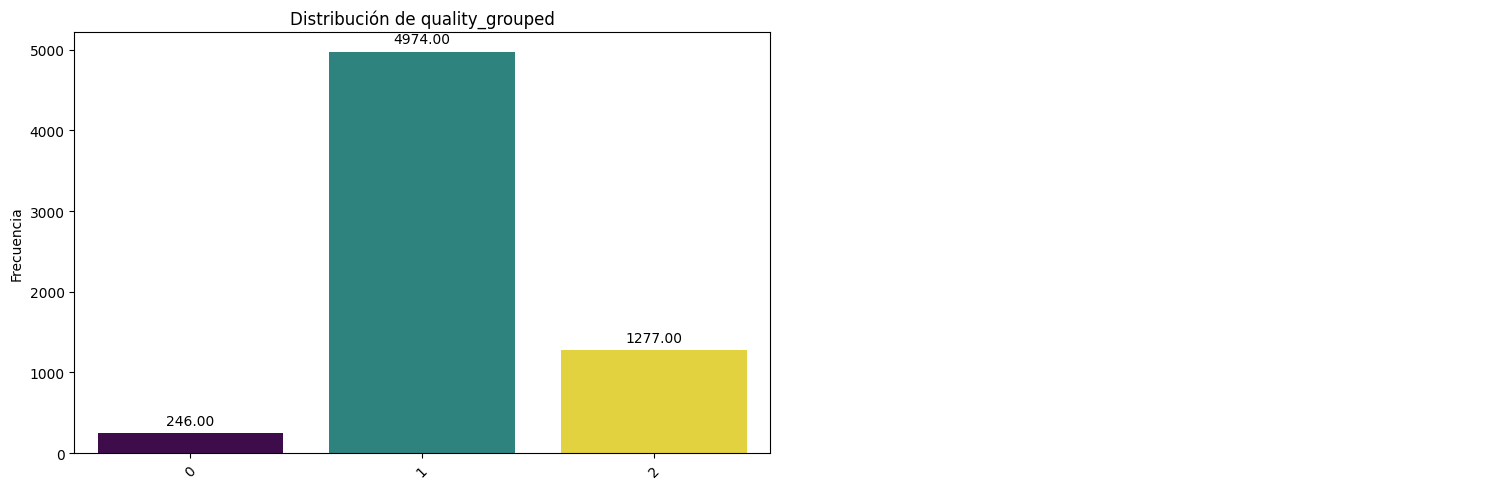

In [ ]:
bt.pinta_distribucion_categoricas(df,["quality_grouped"], mostrar_valores= True, relativa=False) 

probar la técnica de balanceo de primero hacer un under-sampling y luego un over-sampling

#### Train-Test split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, stratify=df["quality_grouped"])

#### Mini-EDA

In [18]:
features_num = df.columns.to_list()
features_num.remove(target_cls)
features_num

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'class']

In [19]:
df.corr(numeric_only=True)["quality_grouped"].sort_values(ascending=False)

quality_grouped         1.000000
alcohol                 0.360580
citric acid             0.073082
free sulfur dioxide     0.048382
sulphates               0.043719
pH                      0.016064
total sulfur dioxide   -0.029793
residual sugar         -0.035250
fixed acidity          -0.052052
chlorides              -0.154945
volatile acidity       -0.194906
density                -0.246116
Name: quality_grouped, dtype: float64

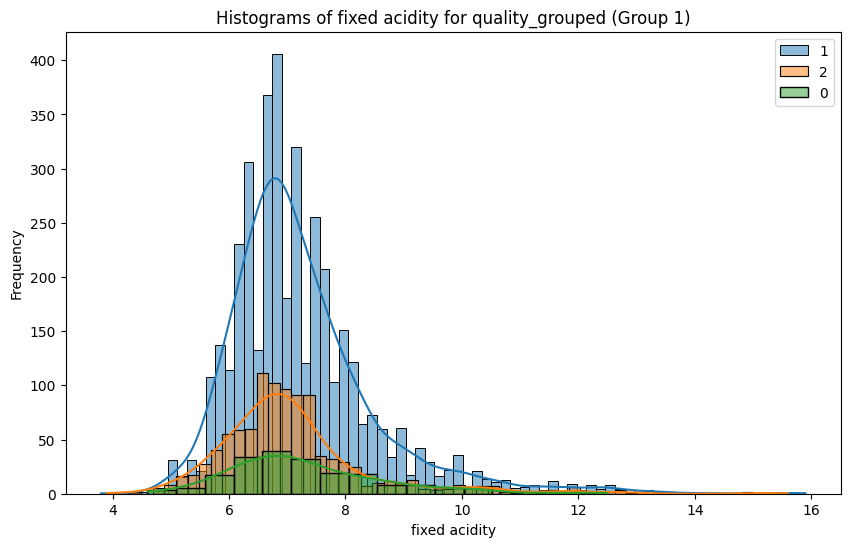

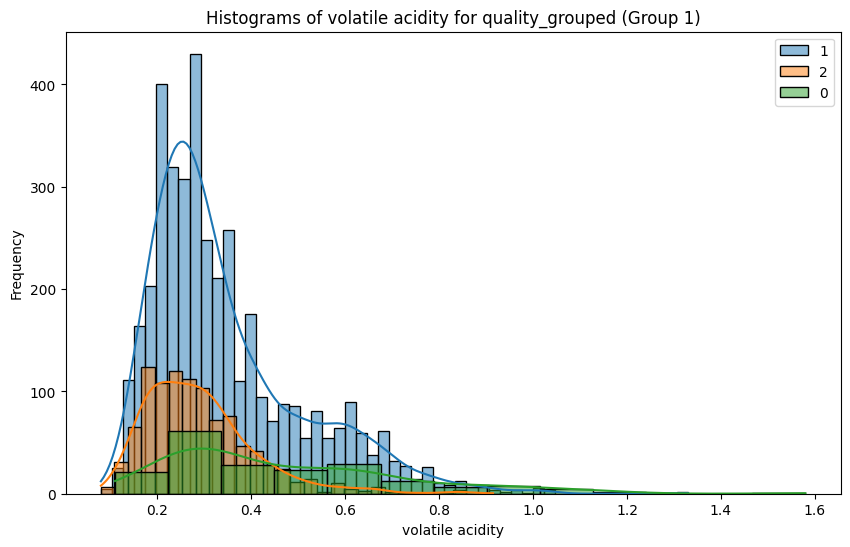

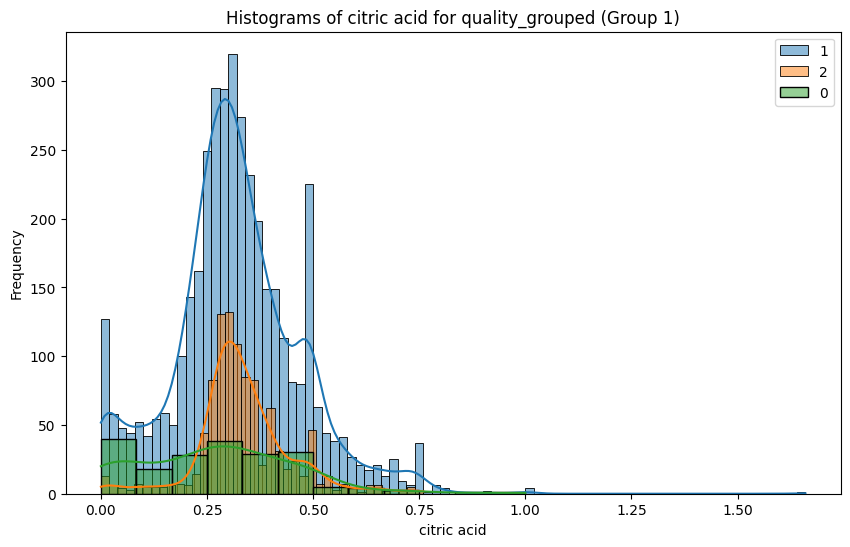

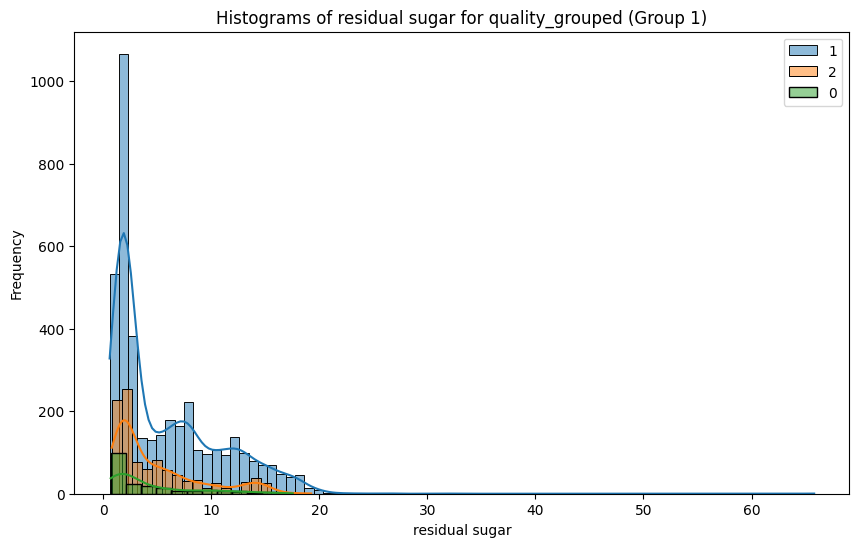

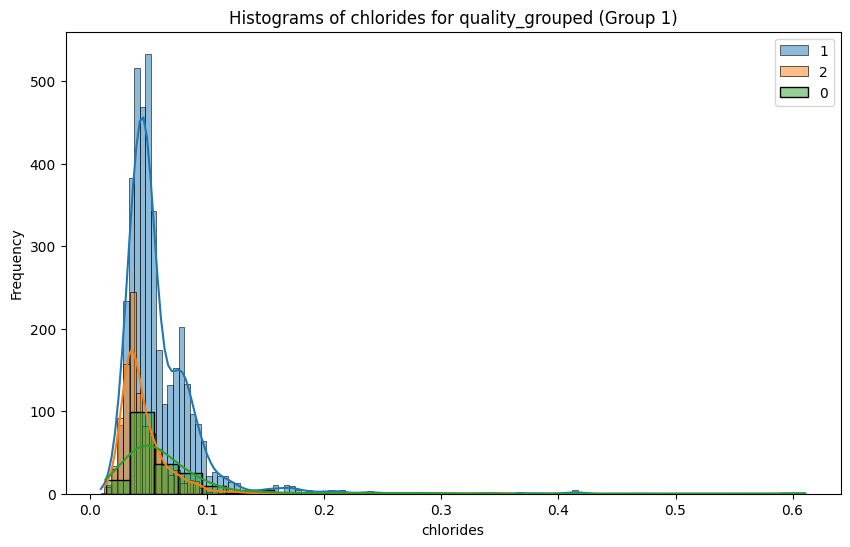

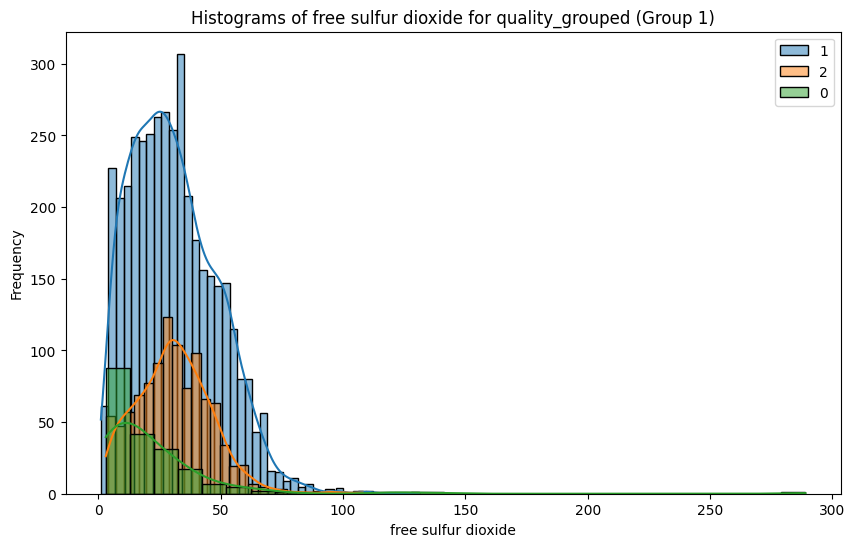

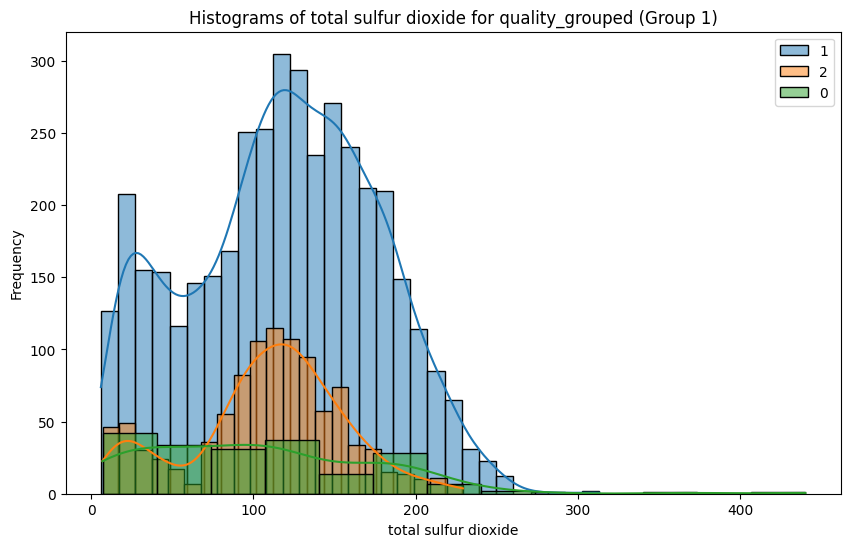

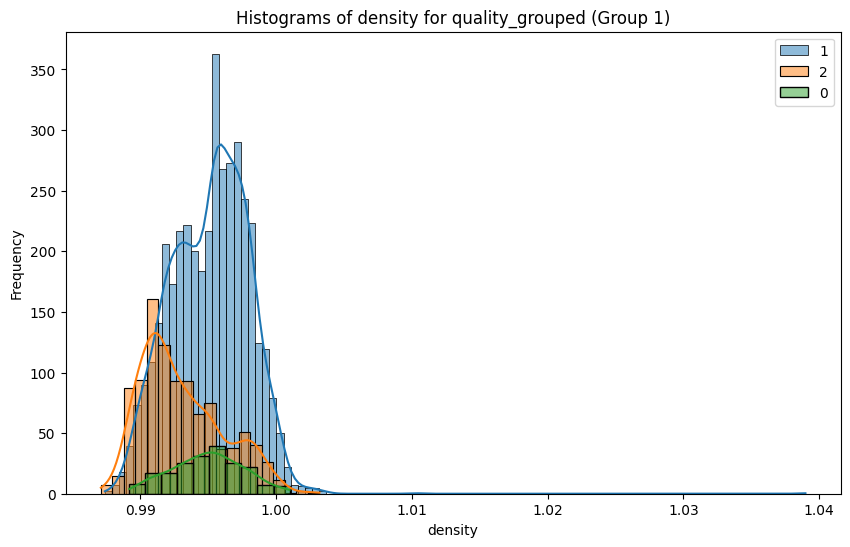

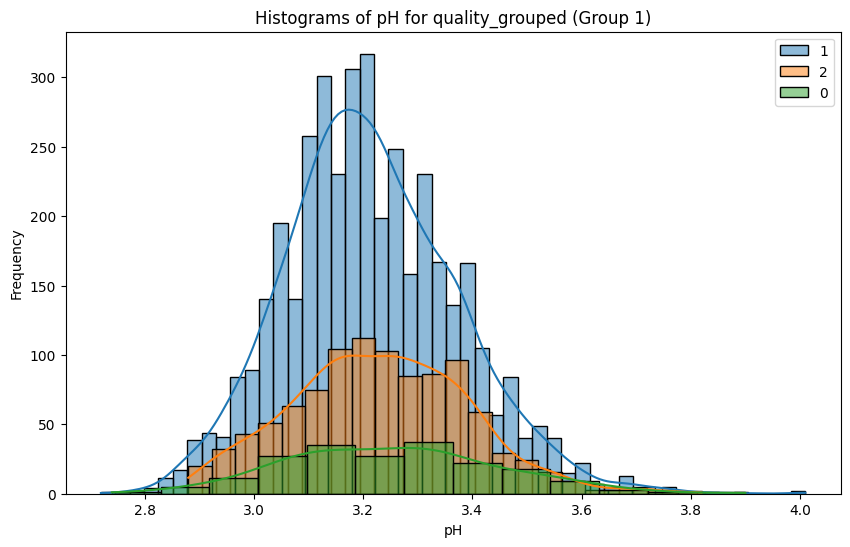

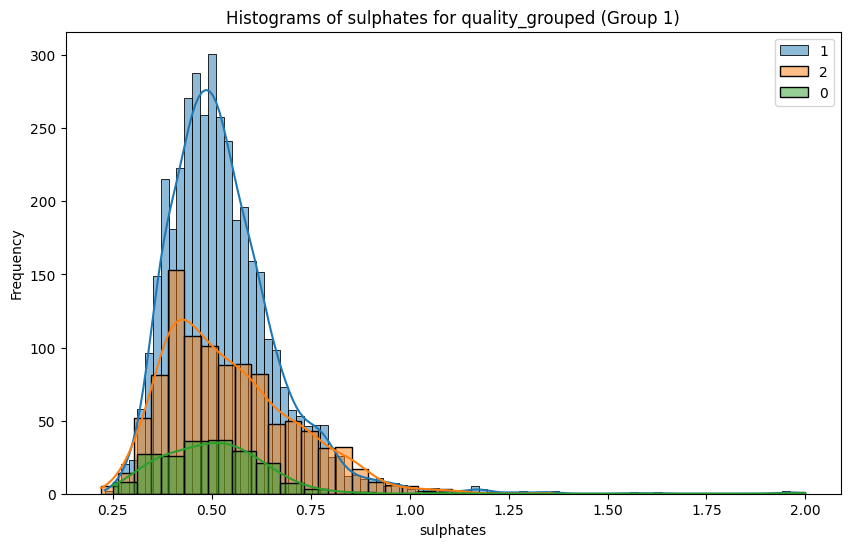

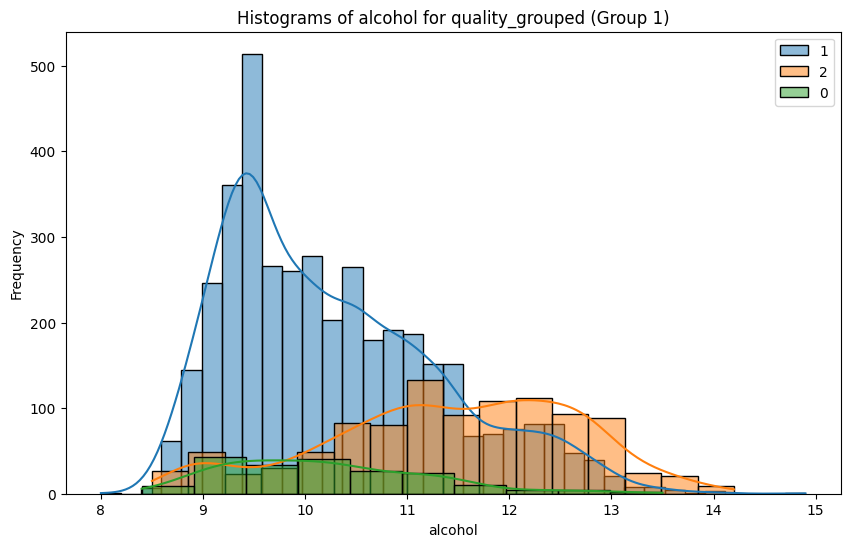

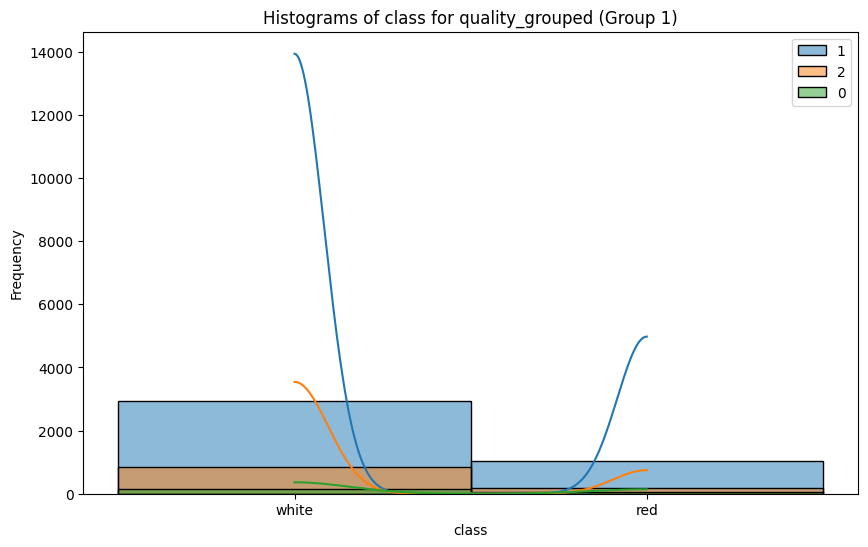

In [25]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col= target_cls, num_col= col, group_size= 3)

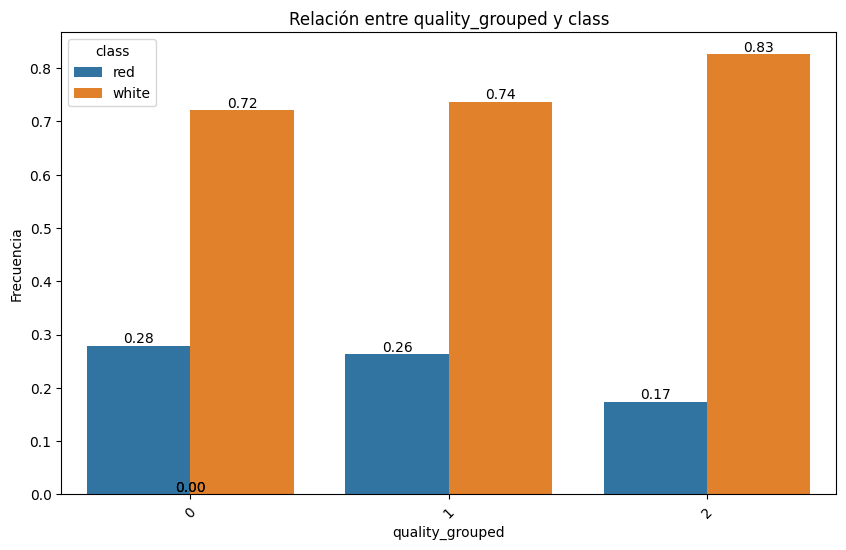

In [26]:
bt.plot_categorical_relationship_fin(train_set, target_cls, "class", show_values= True, relative_freq= True)

#### Procesado de la única feature categórica "class"

In [27]:
train_set = pd.get_dummies(train_set, columns=["class"], dtype=int)
test_set = pd.get_dummies(test_set, columns=["class"], dtype=int)

In [28]:
train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_grouped,class_red,class_white
4381,6.3,0.24,0.22,11.9,0.050,65.0,179.0,0.99659,3.06,0.58,9.3,1,0,1
4214,7.0,0.15,0.38,2.2,0.047,33.0,96.0,0.99280,3.13,0.39,10.4,2,0,1
1886,7.4,0.18,0.40,1.6,0.047,22.0,102.0,0.99370,3.28,0.44,10.7,1,0,1
5955,6.5,0.28,0.28,20.4,0.041,40.0,144.0,1.00020,3.14,0.38,8.7,1,0,1
5829,6.2,0.19,0.38,5.1,0.019,22.0,82.0,0.98961,3.05,0.36,12.5,1,0,1


#### Tratamiento de features

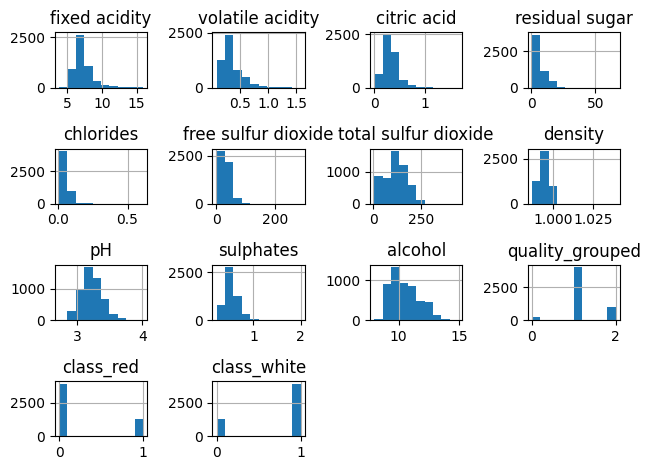

In [ ]:
train_set.hist()
plt.tight_layout()

In [30]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [31]:
# Variables SIN transformación
no_transform = [
    "fixed acidity", "density", "pH", 
    "class_red", "class_white"
]

# Variables con raíz cuadrada
sqrt_vars = [
    "volatile acidity", "citric acid", 
    "chlorides", "sulphates"
]

# Variables con raíz cúbica
cbrt_vars = [
    "free sulfur dioxide", "alcohol"
]

# Variables con log(x+1)
log_vars = [
    "residual sugar", "total sulfur dioxide"
]

In [32]:

#  Raíz cuadrada 
for col in sqrt_vars:
    train_set_scaled[col] = np.sqrt(train_set_scaled[col])
    test_set_scaled[col] = np.sqrt(test_set_scaled[col])

#  Raíz cúbica 
for col in cbrt_vars:
    train_set_scaled[col] = np.cbrt(train_set_scaled[col])
    test_set_scaled[col] = np.cbrt(test_set_scaled[col])

#  Log(x+1) 
for col in log_vars:
    train_set_scaled[col] = np.log(train_set_scaled[col] + 1)
    test_set_scaled[col] = np.log(test_set_scaled[col] + 1)

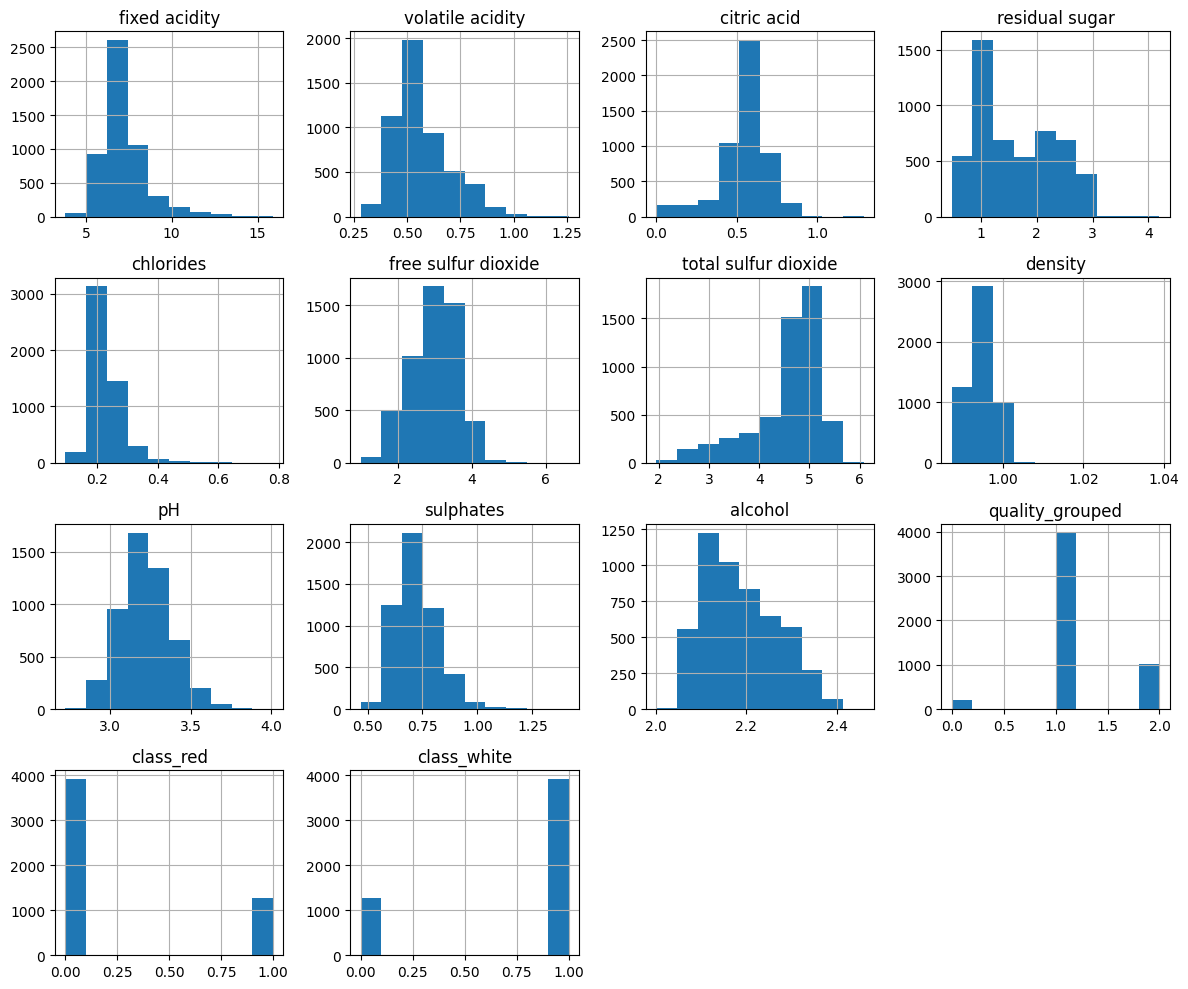

In [33]:
train_set_scaled.hist(figsize=(12,10))
plt.tight_layout()

#### StandardScaler

In [34]:
features = [col for col in train_set.columns if col != target_cls]

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_set_scaled[features] = scaler.fit_transform(train_set_scaled[features])
test_set_scaled[features] = scaler.transform(test_set_scaled[features])

#### Generamos X, Y la versión escalada y sin escalar

In [36]:
# X e y sin escalar
X_train = train_set[features]
y_train = train_set[target_cls]

X_test = test_set[features]
y_test = test_set[target_cls]

# X e y escaladas
X_train_scaled = train_set_scaled[features]
X_test_scaled = test_set_scaled[features]

#### Equilibrio del target usando under y over sampling

In [37]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Undersampling sobre el train escalado
rus = RandomUnderSampler(random_state=42)
X_train_scaled_under, y_train_scaled_under = rus.fit_resample(X_train_scaled, y_train)

# Oversampling con SMOTE sobre el resultado del undersampling
smote = SMOTE(random_state=42)
X_train_scaled_bal, y_train_scaled_bal = smote.fit_resample(X_train_scaled_under, y_train_scaled_under)

#### Modelo Baseline KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# K=3
knn3 = KNeighborsClassifier(n_neighbors=3)
scores_knn3 = cross_val_score(knn3, X_train_scaled_bal, y_train_scaled_bal, 
                              cv=5, scoring="balanced_accuracy")

# K=7
knn7 = KNeighborsClassifier(n_neighbors=7)
scores_knn7 = cross_val_score(knn7, X_train_scaled_bal, y_train_scaled_bal, 
                              cv=5, scoring="balanced_accuracy")

print("Recall macro K=3:", scores_knn3.mean())
print("Recall macro K=7:", scores_knn7.mean())

Recall macro K=3: 0.615982905982906
Recall macro K=7: 0.6106410256410257


#### Entrenamiento de los demás modelos

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

modelos = ["KNN (k=3)", "KNN (k=7)", "Logistic", "RandomForest", "LightGBM"]

# Instancias de modelos
knn3 = KNeighborsClassifier(n_neighbors=3)
knn7 = KNeighborsClassifier(n_neighbors=7)
lr_clf = LogisticRegression(max_iter=10000)
rf_clf = RandomForestClassifier(max_depth=5, random_state=42)
lgb_clf = LGBMClassifier(max_depth=5, random_state=42, verbose=-1, n_jobs=-1)

# Lista de modelos reales
lista_modelos = [knn3, knn7, lr_clf, rf_clf, lgb_clf]

metricas = []

for nombre, modelo in zip(modelos, lista_modelos):
    print(f"\nModelo: {nombre}")
    
    # Usamos el train escalado y balanceado
    X = X_train_scaled_bal
    y = y_train_scaled_bal
    
    metrica = cross_val_score(modelo, X, y, cv=5, scoring="balanced_accuracy").mean()
    metricas.append(metrica)
    
    print(f"Balanced Accuracy (CV=5): {metrica:.4f}")


Modelo: KNN (k=3)
Balanced Accuracy (CV=5): 0.6160

Modelo: KNN (k=7)
Balanced Accuracy (CV=5): 0.6106

Modelo: Logistic
Balanced Accuracy (CV=5): 0.6194

Modelo: RandomForest
Balanced Accuracy (CV=5): 0.6534

Modelo: LightGBM
Balanced Accuracy (CV=5): 0.6636


voy a probar sin el dataset balanceado que cree antes solo con el hiperparámetro class_weight

In [41]:
modelos = ["KNN (k=3)", "KNN (k=7)", "Logistic (CW)", "RandomForest (CW)", "LightGBM (CW)"]

knn3 = KNeighborsClassifier(n_neighbors=3, weights= "distance")
knn7 = KNeighborsClassifier(n_neighbors=7, weights= "distance")
lr_clf = LogisticRegression(max_iter=10000, class_weight="balanced")
rf_clf = RandomForestClassifier(max_depth=5, random_state=42, class_weight="balanced")
lgb_clf = LGBMClassifier(max_depth=5, random_state=42, class_weight="balanced", verbose=-1)

lista_modelos = [knn3, knn7, lr_clf, rf_clf, lgb_clf]

metricas = []

for nombre, modelo in zip(modelos, lista_modelos):
    print(f"\nModelo: {nombre}")
    
    # KNN necesita escalado, los demás también pueden usarlo sin problema
    X = X_train_scaled
    y = y_train
    
    metrica = cross_val_score(modelo, X, y, cv=5, scoring="balanced_accuracy").mean()
    metricas.append(metrica)
    
    print(f"Balanced Accuracy (CV=5): {metrica:.4f}")


Modelo: KNN (k=3)
Balanced Accuracy (CV=5): 0.5705

Modelo: KNN (k=7)
Balanced Accuracy (CV=5): 0.5403

Modelo: Logistic (CW)
Balanced Accuracy (CV=5): 0.6400

Modelo: RandomForest (CW)
Balanced Accuracy (CV=5): 0.6239

Modelo: LightGBM (CW)
Balanced Accuracy (CV=5): 0.6486


#### Ajuste de hiperparámetros del modelo ganador

In [48]:
### LightGBM con SMOTE

from sklearn.model_selection import  GridSearchCV

param_grid = {
    "n_estimators": [100,200],
    "learning_rate": [0.1,0.5,1],
    "max_depth": [5,10,15],
    "min_data_in_leaf": [1,10,20,100]
}

lgb_clf = LGBMClassifier(verbose = -1)

lgb_grid = GridSearchCV(lgb_clf,
                       param_grid= param_grid,
                       cv = 5,
                       scoring= "balanced_accuracy",
                       n_jobs=-1)

lgb_grid.fit(X_train_scaled_bal,y_train_scaled_bal)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LGBMClassifier(verbose=-1)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.1, 0.5, ...], 'max_depth': [5, 10, ...], 'min_data_in_leaf': [1, 10, ...], 'n_estimators': [100, 200]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'balanced_accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold an

In [44]:
lgb_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 15,
 'min_data_in_leaf': 1,
 'n_estimators': 200}

In [45]:
lgb_grid.best_score_

np.float64(0.6720085470085471)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

best_lgb = lgb_grid.best_estimator_
best_lgb.fit(X_train_scaled_bal, y_train_scaled_bal)

y_pred_lgb = best_lgb.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lgb))
print(confusion_matrix(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.13      0.65      0.22        49
           1       0.93      0.52      0.67       995
           2       0.42      0.82      0.55       256

    accuracy                           0.58      1300
   macro avg       0.49      0.66      0.48      1300
weighted avg       0.80      0.58      0.63      1300

[[ 32  10   7]
 [191 519 285]
 [ 15  32 209]]


In [51]:
from xgboost import XGBClassifier

In [52]:
xgb_base = XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

xgb_base.fit(X_train_scaled_bal, y_train_scaled_bal)

y_pred_xgb = xgb_base.predict(X_test_scaled)

print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.12      0.65      0.21        49
           1       0.92      0.53      0.67       995
           2       0.44      0.82      0.57       256

    accuracy                           0.59      1300
   macro avg       0.50      0.67      0.48      1300
weighted avg       0.80      0.59      0.63      1300

[[ 32  12   5]
 [212 523 260]
 [ 12  34 210]]


### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

<Axes: xlabel='alcohol', ylabel='Count'>

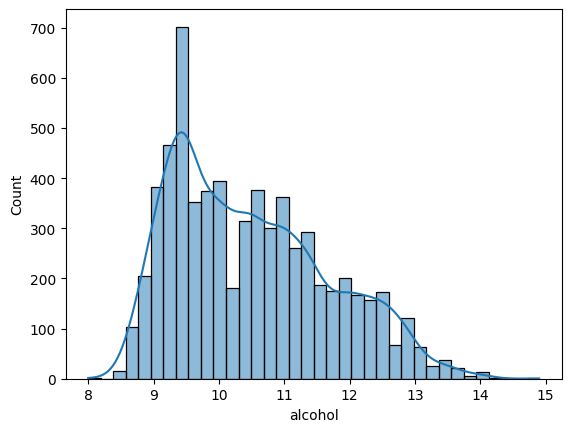

In [66]:
sns.histplot(x= target_reg, data = df, kde= True )

#### Train-Test Split

In [60]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

#### Mini-EDA

In [61]:
target_reg = "alcohol"

In [62]:
features_num = df.columns.to_list()
features_num.remove(target_cls)
features_num

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'class',
 'quality_grouped']

In [67]:
df.corr(numeric_only=True)["alcohol"].sort_values(ascending=False)

alcohol                 1.000000
quality_grouped         0.360580
pH                      0.121248
sulphates              -0.003029
citric acid            -0.010493
volatile acidity       -0.037640
fixed acidity          -0.095452
free sulfur dioxide    -0.179838
chlorides              -0.256916
total sulfur dioxide   -0.265740
residual sugar         -0.359415
density                -0.686745
Name: alcohol, dtype: float64

#### Procesado de feature categórica

In [70]:
train_set = pd.get_dummies(train_set, columns=["class"], dtype=int)
test_set = pd.get_dummies(test_set, columns=["class"], dtype=int)

#### Tratamiento

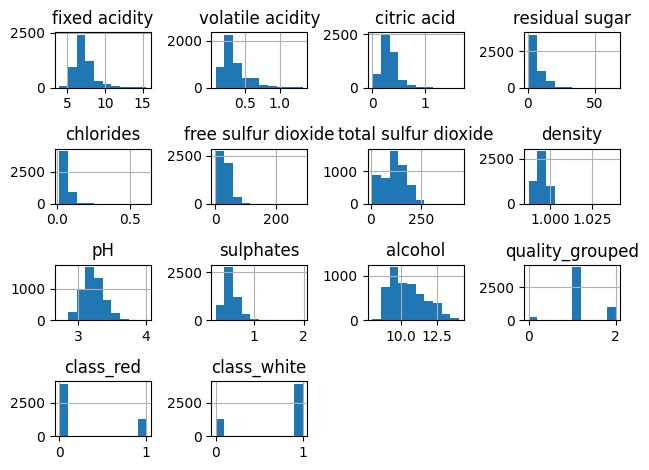

In [71]:
train_set.hist()
plt.tight_layout()

In [72]:
train_set_scaled = train_set.copy()
test_set_scaled = test_set.copy()

In [73]:
# Variables SIN transformación
no_transform = [
    "fixed acidity", "density", "pH", 
    "class_red", "class_white"
]

# Variables con raíz cuadrada
sqrt_vars = [
    "volatile acidity", "citric acid", 
    "chlorides", "sulphates"
]

# Variables con raíz cúbica
cbrt_vars = [
    "free sulfur dioxide", "alcohol"
]

# Variables con log(x+1)
log_vars = [
    "residual sugar", "total sulfur dioxide"
]

In [74]:

#  Raíz cuadrada 
for col in sqrt_vars:
    train_set_scaled[col] = np.sqrt(train_set_scaled[col])
    test_set_scaled[col] = np.sqrt(test_set_scaled[col])

#  Raíz cúbica 
for col in cbrt_vars:
    train_set_scaled[col] = np.cbrt(train_set_scaled[col])
    test_set_scaled[col] = np.cbrt(test_set_scaled[col])

#  Log(x+1) 
for col in log_vars:
    train_set_scaled[col] = np.log(train_set_scaled[col] + 1)
    test_set_scaled[col] = np.log(test_set_scaled[col] + 1)

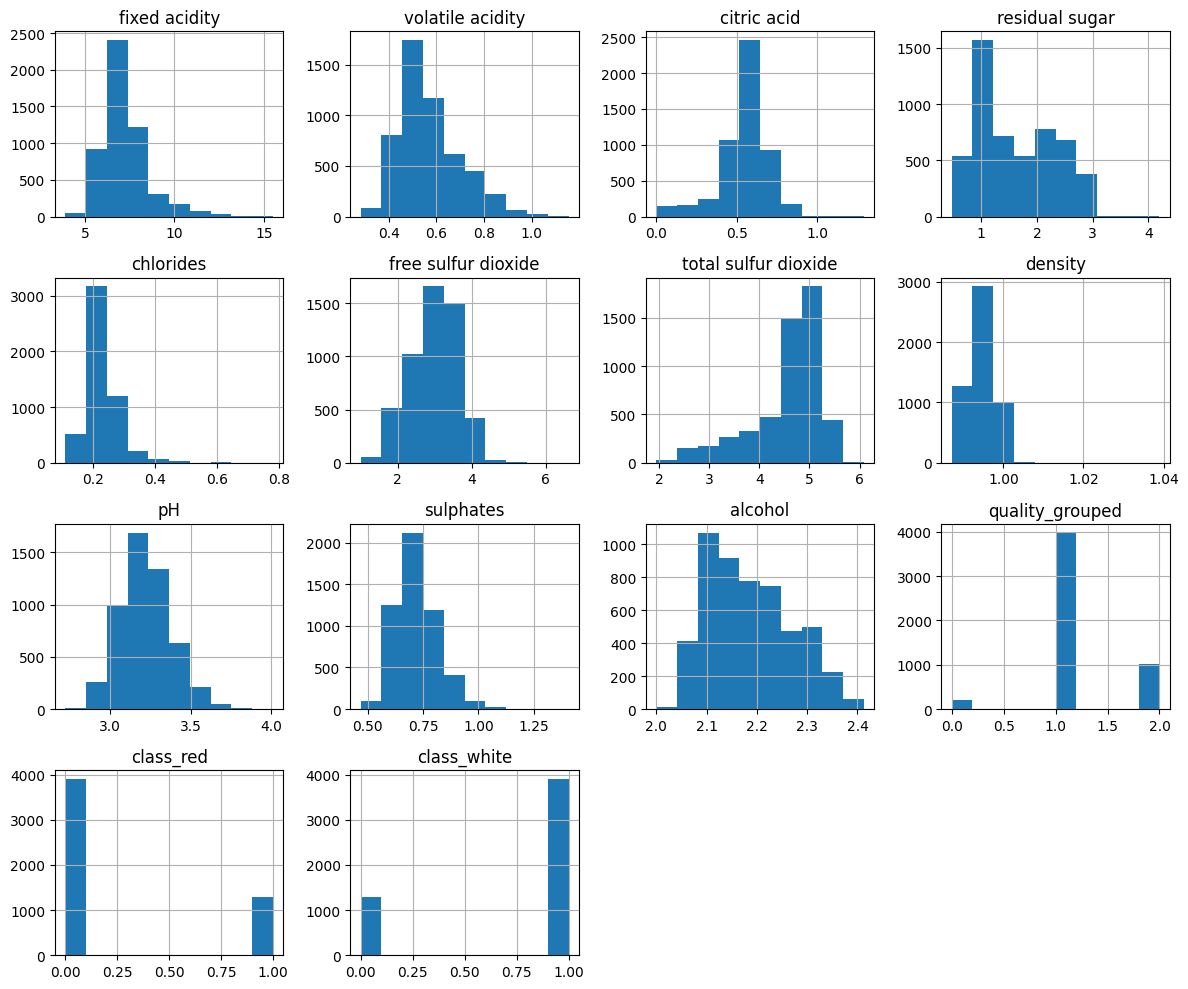

In [75]:
train_set_scaled.hist(figsize=(12,10))
plt.tight_layout()

#### Escalado

In [76]:
features = [col for col in train_set.columns if col != target_reg]

In [77]:
scaler = StandardScaler()

train_set_scaled[features] = scaler.fit_transform(train_set_scaled[features])
test_set_scaled[features] = scaler.transform(test_set_scaled[features])

#### Generamos X, Y la versión escalada y sin escalar

In [78]:
# X e y sin escalar
X_train = train_set[features]
y_train = train_set[target_cls]

X_test = test_set[features]
y_test = test_set[target_cls]

# X e y escaladas
X_train_scaled = train_set_scaled[features]
X_test_scaled = test_set_scaled[features]

#### Entrenamiento de modelos

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np


modelos = ["Linear Regression", "Random Forest", "XGBoost"]

# Instancias de los modelos
lr = LinearRegression()

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

lista_modelos = [lr, rf, xgb]

# Lista para guardar métricas
metricas = []

print("Comparación de modelos (MAE con CV=5)\n")

for nombre, modelo in zip(modelos, lista_modelos):
    print(f"\nModelo: {nombre}")

    # Usamos el train escalado (solo X)
    X = X_train_scaled
    y = y_train  # el target NO se escala

    mae = -cross_val_score(
        modelo,
        X,
        y,
        cv=5,
        scoring="neg_mean_absolute_error"
    ).mean()

    metricas.append(mae)

    print(f"MAE (CV=5): {mae:.4f}")

Comparación de modelos (MAE con CV=5)


Modelo: Linear Regression
MAE (CV=5): 0.4066

Modelo: Random Forest
MAE (CV=5): 0.3220

Modelo: XGBoost
MAE (CV=5): 0.2653


#### Ajuste de hiperparámetros del modelo ganador

In [81]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [4, 6, 8],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor MAE (CV=5):", -grid.best_score_)

Mejores hiperparámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.8}
Mejor MAE (CV=5): 0.23538707594994487


In [82]:
best_xgb = grid.best_estimator_
best_xgb.fit(X_train_scaled, y_train)

y_pred = best_xgb.predict(X_test_scaled)

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

MAE: 0.2168335020505465
RMSE: 0.3530736888203142
R²: 0.9115436237732579
